In [3]:
import os
import cv2
import pandas as pd

# Base path where both 'train' and 'test' folders are located
BASE_PATH = r"C:\Users\harini p\OneDrive\Desktop\emotional detection"

# Emotion folder → label mapping
emotion_map = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'sad': 4,
    'surprise': 5,
    'neutral': 6
}

# Final dataset list
data = []

# Loop over both train and test directories
for usage in ['train', 'test']:
    folder_path = os.path.join(BASE_PATH, usage)
    
    for emotion_folder in os.listdir(folder_path):
        emotion_label = emotion_map.get(emotion_folder.lower())
        if emotion_label is None:
            continue

        emotion_dir = os.path.join(folder_path, emotion_folder)
        
        for image_file in os.listdir(emotion_dir):
            try:
                image_path = os.path.join(emotion_dir, image_file)
                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (48, 48))  # Resize to FER2013 standard size
                pixels = ' '.join(str(pixel) for pixel in img.flatten())
                data.append([emotion_label, pixels, usage])
            except Exception as e:
                print(f"Skipping {image_file} in {emotion_dir}: {e}")

# Convert to DataFrame
df = pd.DataFrame(data, columns=['emotion', 'pixels', 'usage'])

# Save to CSV
df.to_csv("fer2013.csv", index=False)
print("✅ 'fer2013.csv' created successfully!")


✅ 'fer2013.csv' created successfully!


C:\Users\harini p\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.2797 - loss: 1.7648 - val_accuracy: 0.4019 - val_loss: 1.5400
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.4152 - loss: 1.5148 - val_accuracy: 0.4532 - val_loss: 1.4290
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.4607 - loss: 1.4062 - val_accuracy: 0.4851 - val_loss: 1.3616
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.4911 - loss: 1.3312 - val_accuracy: 0.4960 - val_loss: 1.3270
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5195 - loss: 1.2622 - val_accuracy: 0.4992 - val_loss: 1.3093
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5351 - loss: 1.2132 - val_accuracy: 0.5093 - val_loss: 1.2782
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5525 - loss: 1.1759 - val_accuracy: 0.5135 - val_loss: 1.2787
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5736 - loss: 1.1229 - 

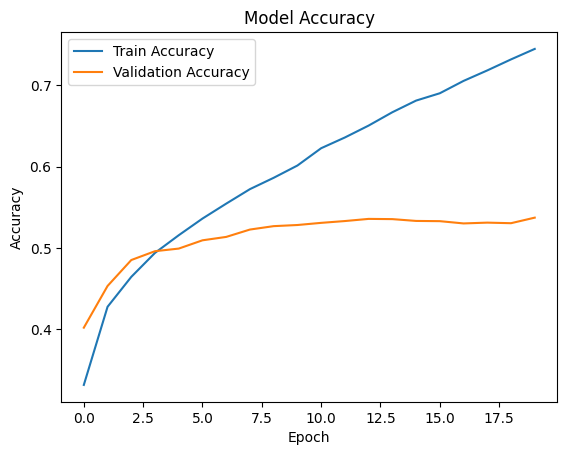

In [4]:
# train_emotion_model.ipynb

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Step 1: Load the CSV
df = pd.read_csv("fer2013.csv")

# Step 2: Prepare the data
X = []
y = []

for index, row in df.iterrows():
    pixels = list(map(int, row['pixels'].split()))
    img = np.array(pixels).reshape(48, 48)
    X.append(img)
    y.append(row['emotion'])

X = np.array(X)
y = np.array(y)

# Normalize pixel values
X = X / 255.0
X = np.expand_dims(X, -1)  # Shape: (samples, 48, 48, 1)

# One-hot encode labels
y = to_categorical(y, num_classes=7)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Step 7: Save the model
os.makedirs("model", exist_ok=True)

model_json = model.to_json()
with open("model/emotion_model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model/emotion_model.weights.h5")
print("✅ Emotion model saved successfully!")

# Step 8 (Optional): Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [5]:
import os
print(os.getcwd())


C:\Users\harini p
